<a href="https://colab.research.google.com/github/sreedevigattu/wids2021/blob/main/impute_vitals_Apachecomorb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


###Data Viz

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TrainingWiDS2021.csv',index_col=0)

In [ ]:
df_ul=pd.read_csv('/content/drive/MyDrive/UnlabeledWiDS2021.csv',index_col=0)


In [ ]:
ddic=pd.read_csv('/content/drive/MyDrive/DataDictionaryWiDS2021.csv')

In [ ]:
ddic['Category'].unique()

array(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs',
       'labs blood gas', 'APACHE comorbidity', 'Target Variable'],
      dtype=object)

In [ ]:
pd.options.display.max_colwidth = 200

### First looking into the vitals dictinoary-NON BP

In [ ]:
#Non-BP
ddic.iloc[:,1:5].loc[(ddic['Category']=='vitals')& (ddic['Unit of Measure']!='Millimetres of mercury')]

,Variable Name,Unit of Measure,Data Type,Description
51,d1_heartrate_max,Beats per minute,numeric,The patient's highest heart rate during the first 24 hours of their unit stay
52,d1_heartrate_min,Beats per minute,numeric,The patient's lowest heart rate during the first 24 hours of their unit stay
59,d1_resprate_max,Breaths per minute,numeric,The patient's highest respiratory rate during the first 24 hours of their unit stay
60,d1_resprate_min,Breaths per minute,numeric,The patient's lowest respiratory rate during the first 24 hours of their unit stay
61,d1_spo2_max,Percentage,numeric,The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay
62,d1_spo2_min,Percentage,numeric,The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay
69,d1_temp_max,Degrees Celsius,numeric,"The patient's highest core temperature during the first 24 hours of their unit stay, invasively measured"
70,d1_temp_min,Degrees Celsius,numeric,The patient's lowest core temperature during the first 24 hours of their unit stay
77,h1_heartrate_max,Beats per minute,numeric,The patient's highest heart rate during the first hour of their unit stay
78,h1_heartrate_min,Beats per minute,numeric,The patient's lowest heart rate during the first hour of their unit stay


In [ ]:
nonbp=ddic.index[(ddic['Category']=='vitals')& (ddic['Unit of Measure']!='Millimetres of mercury')]
# Saving the column indices to see the final dataframe

When looking into the Dataframe **nonbp- 1** needs to be done since I have removed the unnamed header column from the
main dataframe

In [ ]:
nonbp-1


Int64Index([50, 51, 58, 59, 60, 61, 68, 69, 76, 77, 84, 85, 86, 87, 94, 95], dtype='int64')

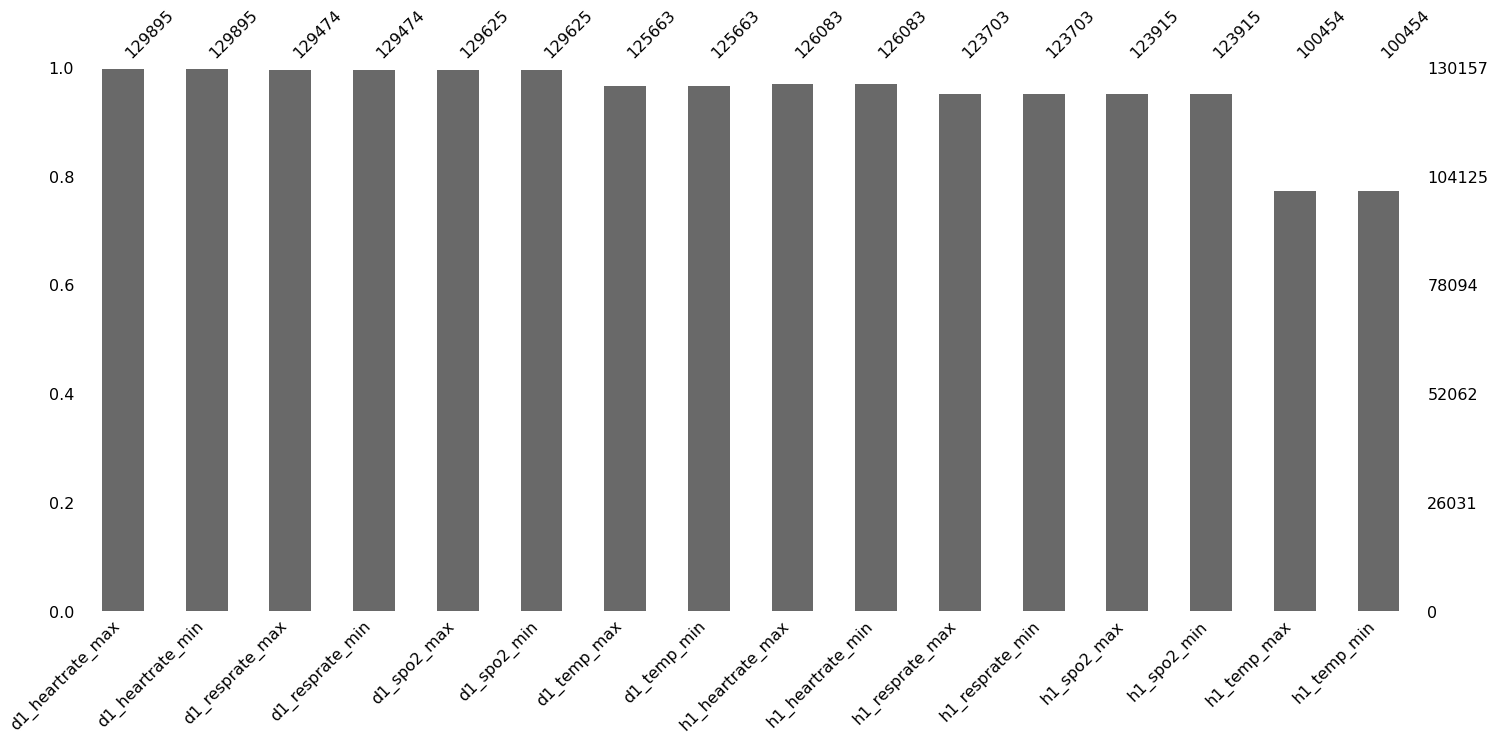

In [ ]:
msno.bar(df.iloc[:,nonbp-1])

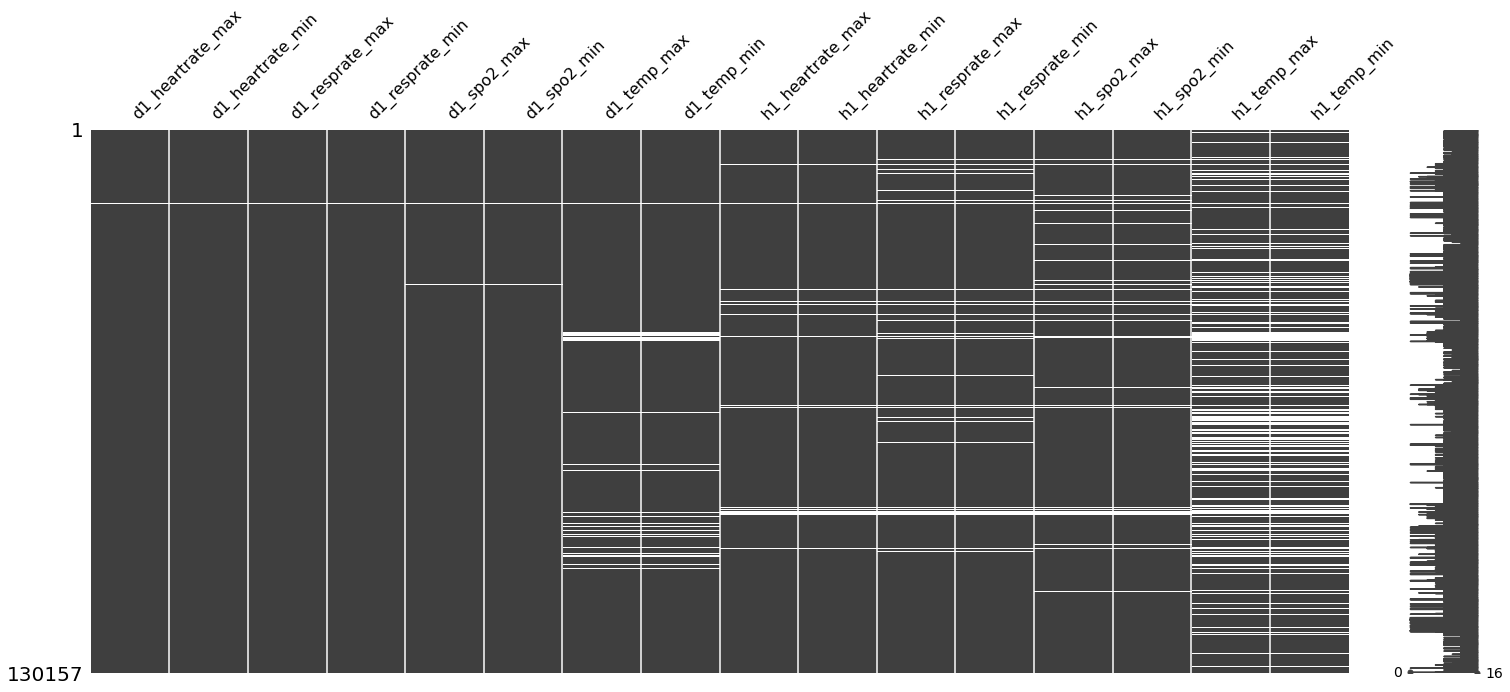

In [ ]:
msno.matrix(df.iloc[:,nonbp-1])

In [ ]:
# Remove the rows where a single vital measurement is also not present(excluding BP)- 168 such records
df.dropna(subset=df.columns[nonbp-1],how='all',inplace=True)

Text(0.5, 1.0, 'Temperature first hour and 24 hr distribution')

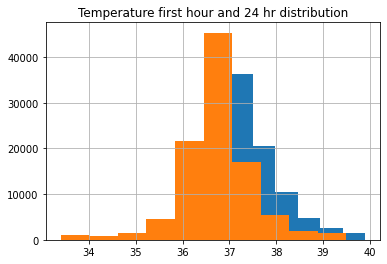

In [ ]:
df['d1_temp_max'].hist()
df['h1_temp_max'].hist()
plt.title('Temperature first hour and 24 hr distribution')

In [ ]:
# Treating the h1 empty columns by imputing with data from d1(day-24 hours)
df.loc[df['h1_temp_max'].isnull(),'h1_temp_max']=df['d1_temp_max']
df.loc[df['h1_temp_min'].isnull(),'h1_temp_min']=df['d1_temp_min']
# reverse
df.loc[df['d1_temp_max'].isnull(),'d1_temp_max']=df['h1_temp_max']
df.loc[df['d1_temp_min'].isnull(),'d1_temp_min']=df['h1_temp_min']

In [ ]:
#Same step for Spo2 h1 imputed by d1 and vice versa
df.loc[df['h1_spo2_max'].isnull(),'h1_spo2_max']=df['d1_spo2_max']
df.loc[df['h1_spo2_min'].isnull(),'h1_spo2_min']=df['d1_spo2_min']

df.loc[df['d1_spo2_max'].isnull(),'d1_spo2_max']=df['h1_spo2_max']
df.loc[df['d1_spo2_min'].isnull(),'d1_spo2_min']=df['h1_spo2_min']

In [ ]:
#Heart rate h1 imputed by d1 and vice versa
df.loc[df['h1_heartrate_max'].isnull(),'h1_heartrate_max']=df['d1_heartrate_max']
df.loc[df['h1_heartrate_min'].isnull(),'h1_heartrate_min']=df['d1_heartrate_min']

df.loc[df['d1_heartrate_max'].isnull(),'d1_heartrate_max']=df['h1_heartrate_max']
df.loc[df['d1_heartrate_min'].isnull(),'d1_heartrate_min']=df['h1_heartrate_min']

In [ ]:
#Respiratory rate imputed by d1 and vice versa
df.loc[df['h1_resprate_max'].isnull(),'h1_resprate_max']=df['d1_resprate_max']
df.loc[df['h1_resprate_min'].isnull(),'h1_resprate_min']=df['d1_resprate_min']

df.loc[df['d1_resprate_max'].isnull(),'d1_resprate_max']=df['h1_resprate_max']
df.loc[df['d1_resprate_min'].isnull(),'d1_resprate_min']=df['h1_resprate_min']

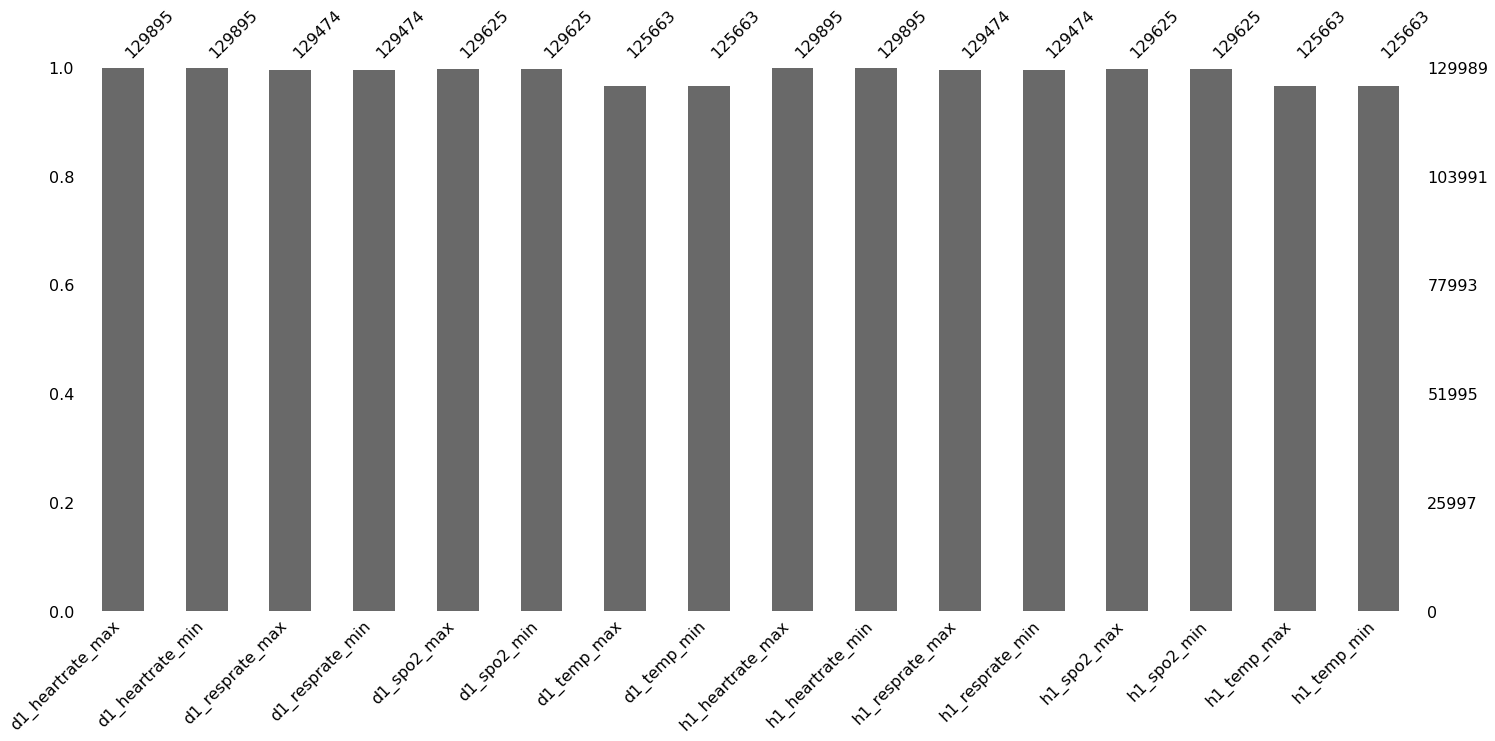

In [ ]:
# Distribution after imputing
msno.bar(df.iloc[:,nonbp-1])

### Vitals BP 

In [ ]:
#Vitals Data dictionary
ddic.iloc[:,1:5].loc[(ddic['Category']=='vitals') & (ddic['Unit of Measure']=='Millimetres of mercury')]

,Variable Name,Unit of Measure,Data Type,Description
45,d1_diasbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured"
46,d1_diasbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured"
47,d1_diasbp_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
48,d1_diasbp_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
49,d1_diasbp_noninvasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured"
50,d1_diasbp_noninvasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured"
53,d1_mbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, invasively measured"
54,d1_mbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, invasively measured"
55,d1_mbp_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
56,d1_mbp_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"


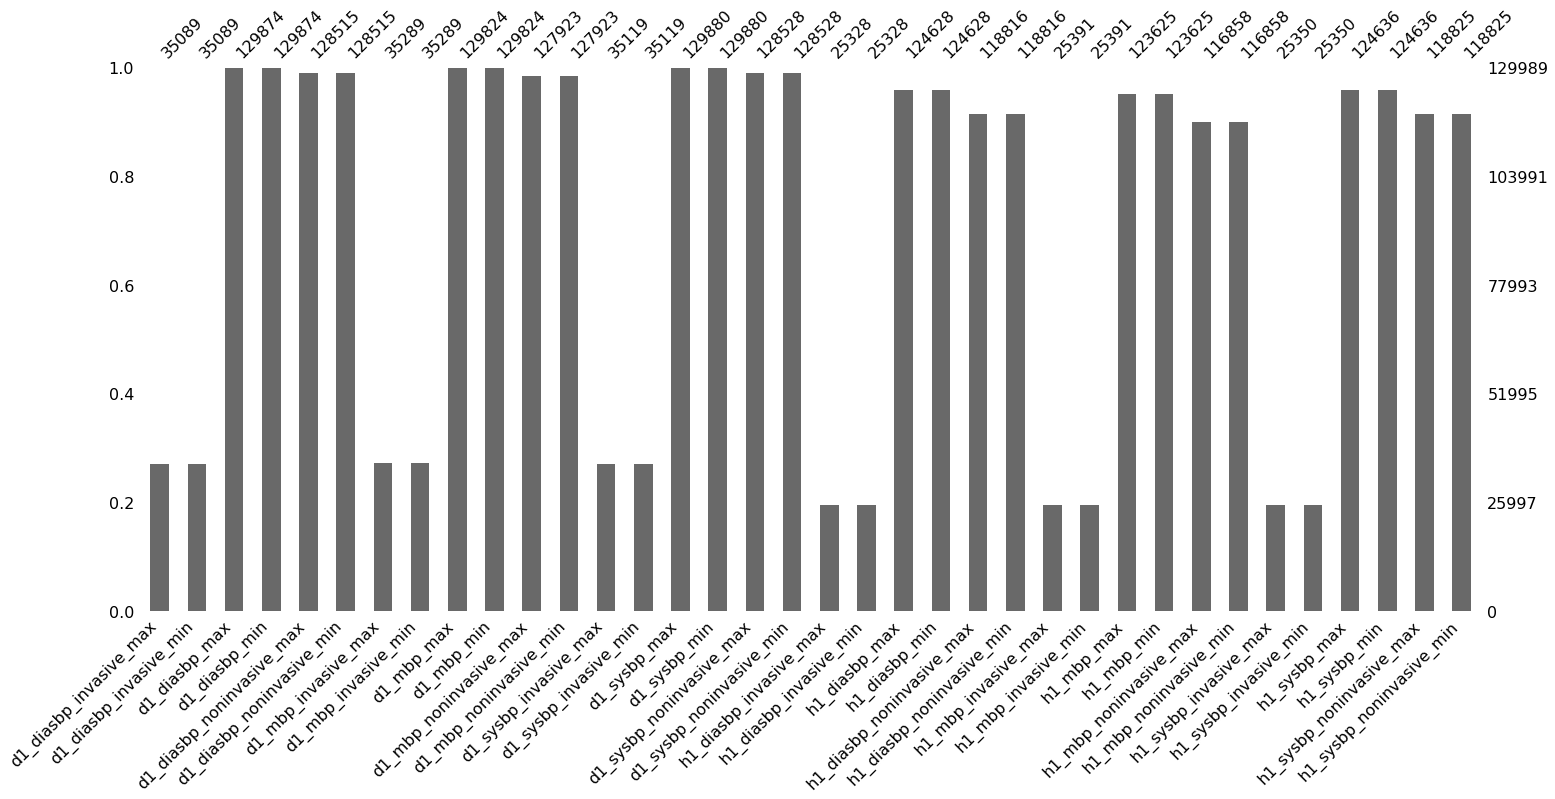

In [ ]:

# Data distribution and nulls in bp
msno.bar(df.filter(regex='bp'))

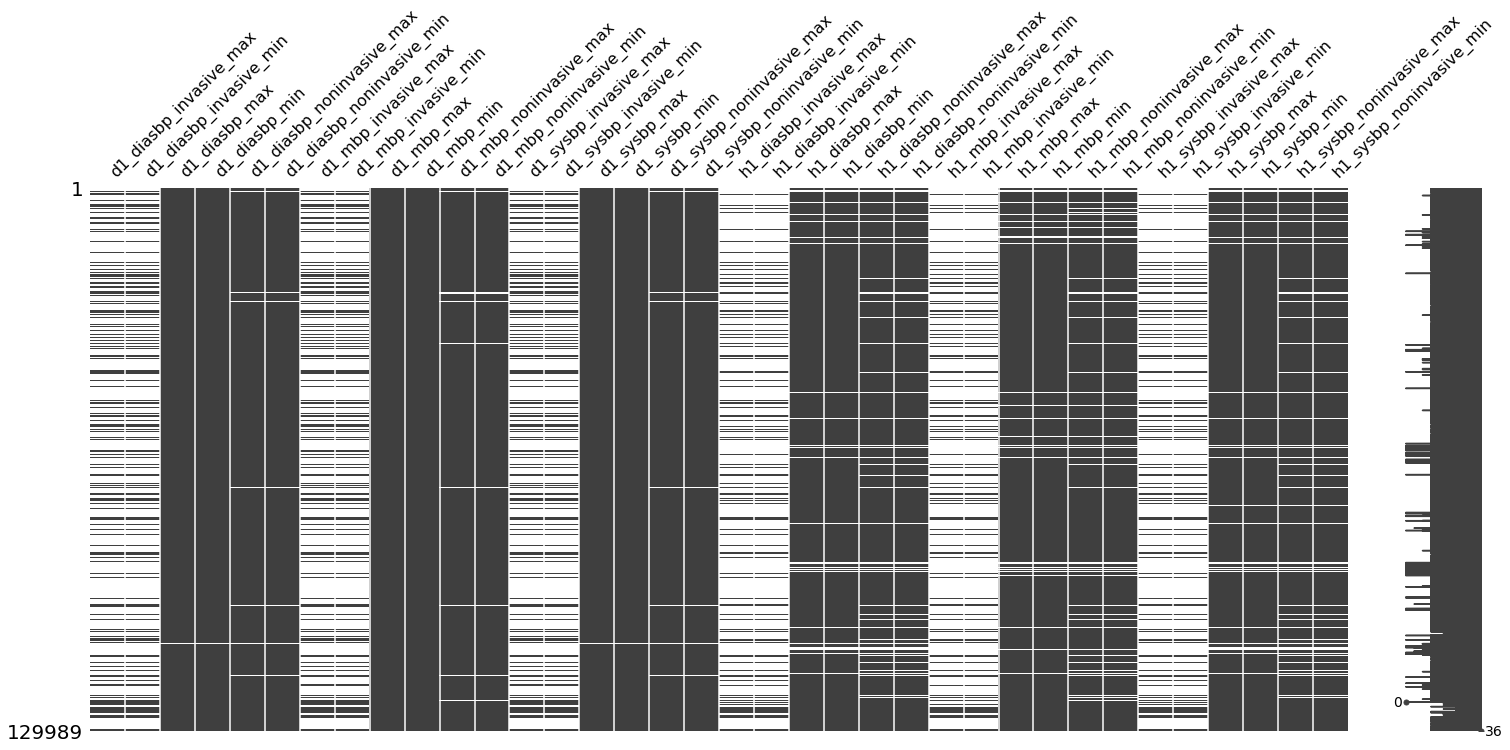

In [ ]:
msno.matrix(df.filter(regex='bp'))

**Approach followed**
1. Impute invasive category with general(non specified) pressure( Eg: d1_sysbp_invasive_min imputed by d1_sysbp_min)
2. Impute general with invasive category ( Eg: d1_mbp_max imputed by d1_mbp_invasive_max)
3. Impute h1 by d1( Invasive by invasive, general by general)
4. Impute h1 by d1 (invasive by general)
5. Drop all non invasive bp labels( Yet to be done, shall do it after combining all data points)- Reduce no of BP columns from 36 to 24


Possible approaches-:
Approach 1
1. Impute General column with invasive data
2. Impute general column with Non invasive data
3. Impute invasive with General
4. Impute Non invasive with General 

Approach 2
1. Impute General with invasive and non invasive data
2. Drop invasive and non invasive, retain general

Approach 3
1. Impute Invasive column with General
2. Impute Non invasive column with General 
3. Drop general 



(array([  478.,   436.,  1056.,  3899., 10599., 10080.,  4829.,  2288.,
          945.,   509.]),
 array([ 10. ,  26.2,  42.4,  58.6,  74.8,  91. , 107.2, 123.4, 139.6,
        155.8, 172. ]),
 <a list of 10 Patch objects>)

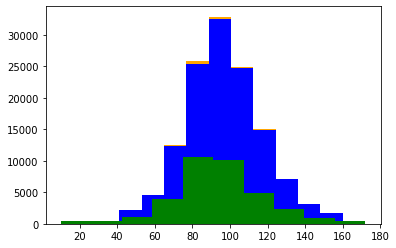

In [ ]:

plt.hist(df['d1_sysbp_min'],color='orange')
plt.hist(df['d1_sysbp_noninvasive_min'],color='blue')
plt.hist(df['d1_sysbp_invasive_min'],color='green')



In [ ]:
# To draw a boxplot of all minimum columns and max columns together
#List a has all max columns, List b has all min columns
a=[]
for col in df.columns:
  if 'bp' in col:
    if 'max' in col:
      a.append(col)

b=[]
for col in df.columns:
  if 'bp' in col:
    if 'min' in col:
      b.append(col)


Text(0.5, 1.0, 'Max BP boxplot')

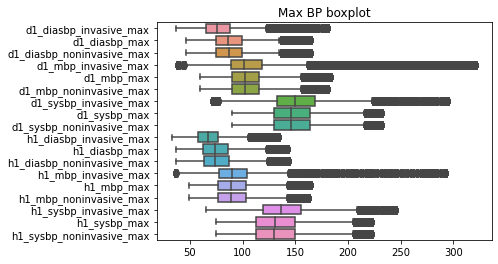

In [ ]:
sns.boxplot(data=df[a], orient="h") #palette="Set2")
plt.title('Max BP boxplot')

Text(0.5, 1.0, 'Min BP boxplot')

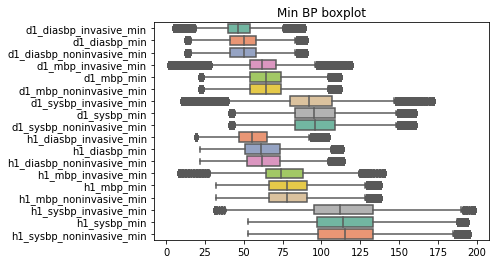

In [ ]:
#sns.boxplot(df[i for i in b])
sns.boxplot(data=df[b], orient="h", palette="Set2")
plt.title('Min BP boxplot')

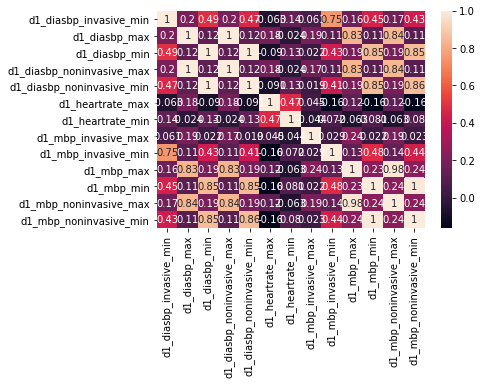

In [ ]:
corrMatrix = df.iloc[:,45:58].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
#Diasbp max and Diasbpnon inva max have full correlation even  for min

In [ ]:
## Imputation approach as mentioned earlier - Diastolic pressures
df.loc[df['d1_diasbp_invasive_max'].isnull(),'d1_diasbp_invasive_max']=df['d1_diasbp_max']
df.loc[df['d1_diasbp_invasive_min'].isnull(),'d1_diasbp_invasive_min']=df['d1_diasbp_min']
#df.loc[df['h1_resprate_min'].isnull(),'h1_heartrate_min']=df['d1_resprate_min']
df.loc[df['h1_diasbp_invasive_max'].isnull(),'h1_diasbp_invasive_max']=df['h1_diasbp_max']
df.loc[df['h1_diasbp_invasive_min'].isnull(),'h1_diasbp_invasive_min']=df['h1_diasbp_min']

In [ ]:
## Imputation approach as mentioned earlier - Mean pressures
df.loc[df['d1_mbp_invasive_max'].isnull(),'d1_mbp_invasive_max']=df['d1_mbp_max']
df.loc[df['d1_mbp_invasive_min'].isnull(),'d1_mbp_invasive_min']=df['d1_mbp_min']
#df.loc[df['h1_resprate_min'].isnull(),'h1_heartrate_min']=df['d1_resprate_min']
df.loc[df['h1_mbp_invasive_max'].isnull(),'h1_mbp_invasive_max']=df['h1_mbp_max']
df.loc[df['h1_mbp_invasive_min'].isnull(),'h1_mbp_invasive_min']=df['h1_mbp_min']

In [ ]:
## Imputation approach as mentioned earlier - Sysstolic pressures
df.loc[df['d1_sysbp_invasive_max'].isnull(),'d1_sysbp_invasive_max']=df['d1_sysbp_max']
df.loc[df['d1_sysbp_invasive_min'].isnull(),'d1_sysbp_invasive_min']=df['d1_sysbp_min']
#df.loc[df['h1_resprate_min'].isnull(),'h1_heartrate_min']=df['d1_resprate_min']
df.loc[df['h1_sysbp_invasive_max'].isnull(),'h1_sysbp_invasive_max']=df['h1_sysbp_max']
df.loc[df['h1_sysbp_invasive_min'].isnull(),'h1_sysbp_invasive_min']=df['h1_sysbp_min']

In [ ]:
#filling up of h1 inva
df.loc[df['h1_sysbp_invasive_max'].isnull(),'h1_sysbp_invasive_max']=df['d1_sysbp_invasive_max']
df.loc[df['h1_sysbp_invasive_min'].isnull(),'h1_sysbp_invasive_min']=df['d1_sysbp_invasive_min']
df.loc[df['h1_mbp_invasive_max'].isnull(),'h1_mbp_invasive_max']=df['d1_mbp_invasive_max']
df.loc[df['h1_mbp_invasive_min'].isnull(),'h1_mbp_invasive_min']=df['d1_mbp_invasive_min']
df.loc[df['h1_diasbp_invasive_max'].isnull(),'h1_diasbp_invasive_max']=df['d1_diasbp_invasive_max']
df.loc[df['h1_diasbp_invasive_min'].isnull(),'h1_diasbp_invasive_min']=df['d1_diasbp_invasive_min']

In [ ]:
#filling up of h1 
df.loc[df['h1_diasbp_max'].isnull(),'h1_diasbp_max']=df['d1_diasbp_max']
df.loc[df['h1_diasbp_min'].isnull(),'h1_diasbp_min']=df['d1_diasbp_min']
df.loc[df['h1_mbp_max'].isnull(),'h1_mbp_max']=df['d1_mbp_max']
df.loc[df['h1_mbp_min'].isnull(),'h1_mbp_min']=df['d1_mbp_min']
df.loc[df['h1_sysbp_max'].isnull(),'h1_sysbp_max']=df['d1_sysbp_max']
df.loc[df['h1_sysbp_min'].isnull(),'h1_sysbp_min']=df['d1_sysbp_min']

In [ ]:
# filling of left out inva in h1

df.loc[df['h1_diasbp_invasive_max'].isnull(),'h1_diasbp_invasive_max']=df['d1_diasbp_max']
df.loc[df['h1_diasbp_invasive_min'].isnull(),'h1_diasbp_invasive_min']=df['d1_diasbp_min']
df.loc[df['h1_mbp_invasive_max'].isnull(),'h1_mbp_invasive_max']=df['d1_mbp_max']
df.loc[df['h1_mbp_invasive_min'].isnull(),'h1_mbp_invasive_min']=df['d1_mbp_min']
df.loc[df['h1_sysbp_invasive_max'].isnull(),'h1_sysbp_invasive_max']=df['d1_sysbp_max']
df.loc[df['h1_sysbp_invasive_min'].isnull(),'h1_sysbp_invasive_min']=df['d1_sysbp_min']

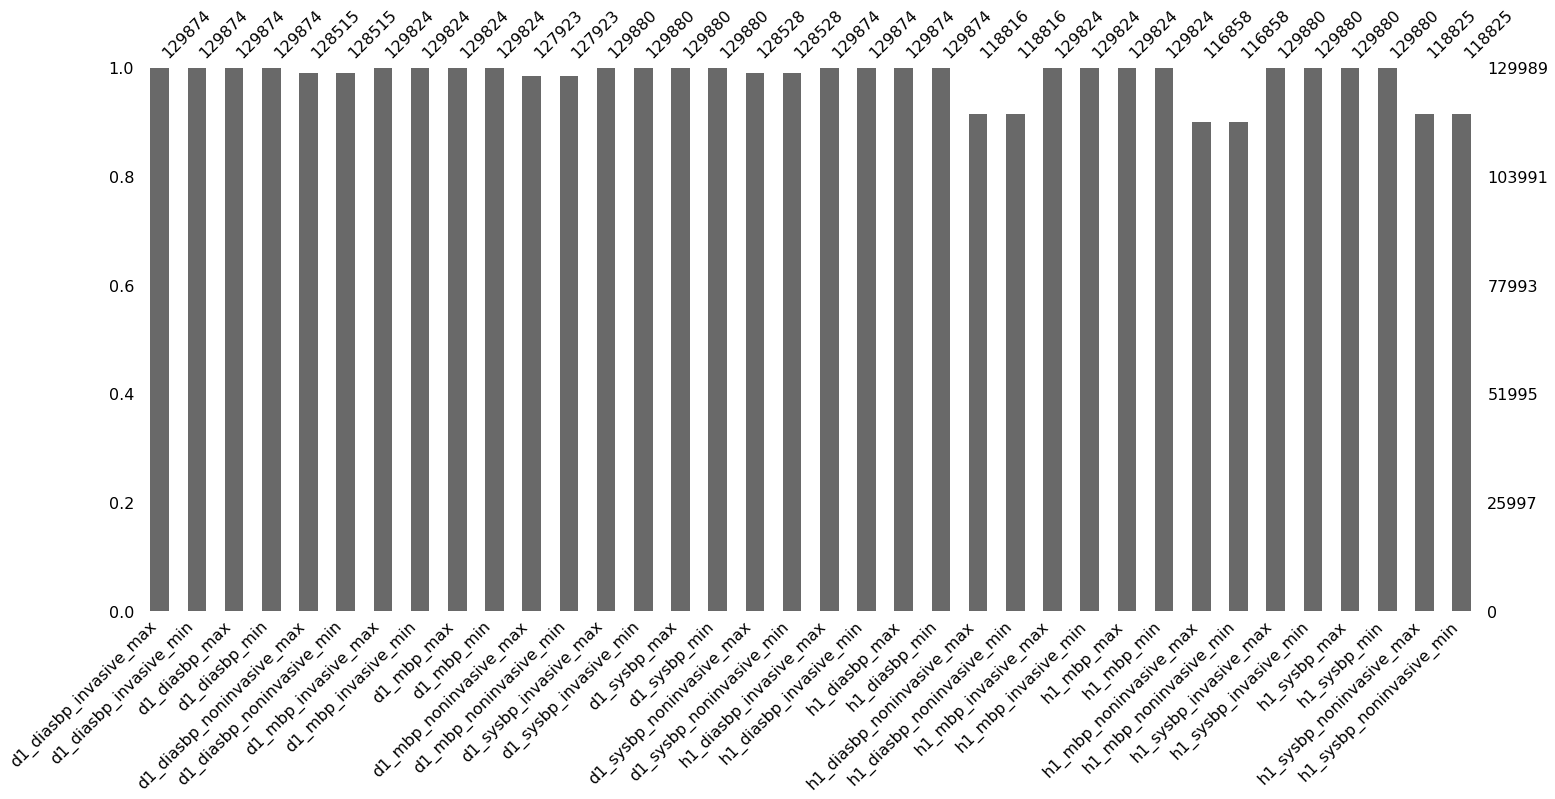

In [ ]:
#After filling up
msno.bar(df.filter(regex='bp')) # Yet to drop non invasive columns

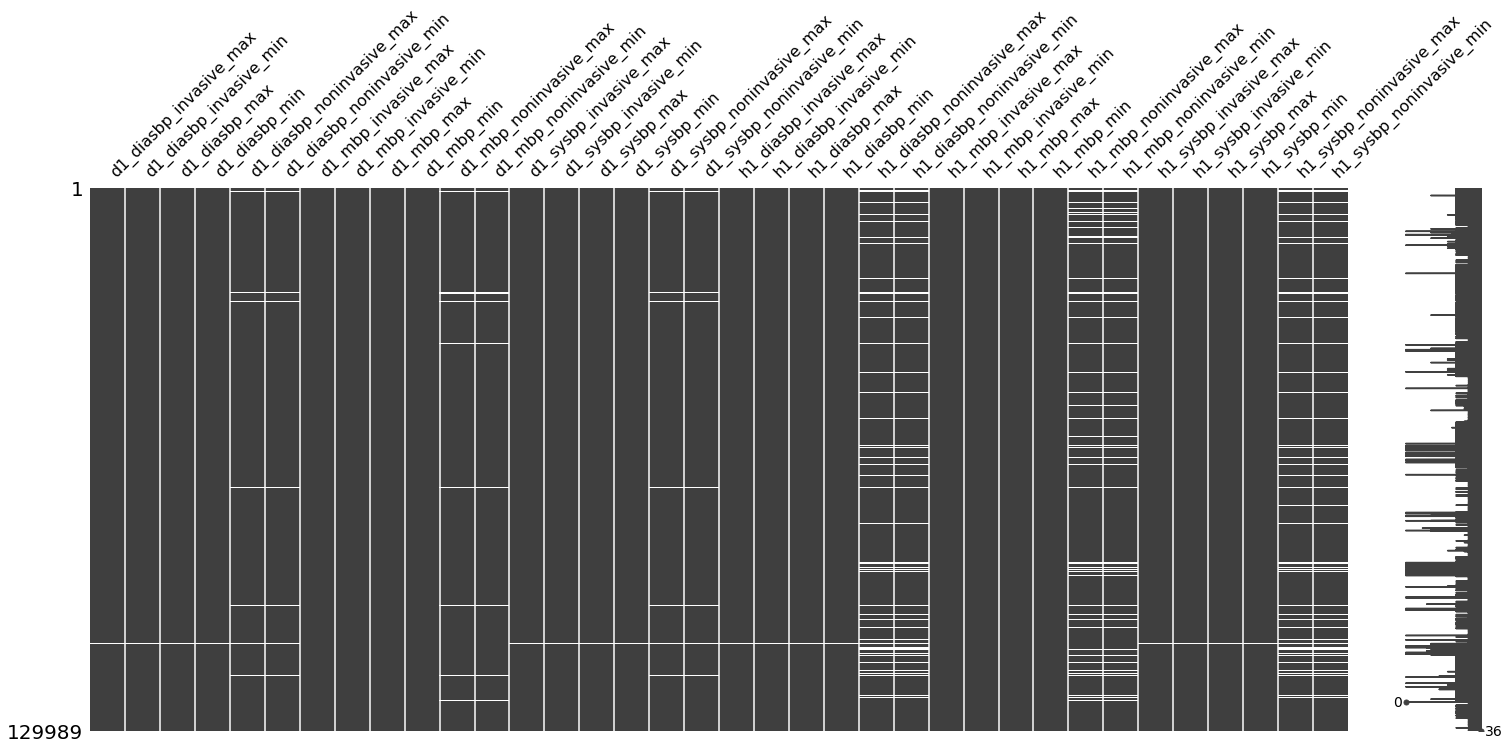

In [ ]:
msno.matrix(df.filter(regex='bp'))

In [ ]:
noninva=[]
for i in df.columns:
  if "noninvasive" in i:
    noninva.append(i)


In [ ]:
#To drop non invasive add inplace=True
df.drop(columns=noninva)


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,...,11.3,11.3,36.9,36.9,1.30,1.30,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.450,7.450,51.0,51.0,54.8,51.000000,37.0,37.0,7.450,7.450,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,NaN,...,11.6,11.6,34.0,34.0,1.60,1.10,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.440,7.340,337.0,102.0,342.5,236.666667,36.0,33.0,7.370,7.340,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,1109,admit,Cardiac ICU,0.023611,0,90.0,NaN,110.0,104.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,NaN,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,1106,admit,MICU,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,NaN,4.0,6

### APACHE Comorbidities

In [ ]:
comorb=ddic.index[(ddic['Category']=='APACHE comorbidity')]
comorb

Int64Index([173, 174, 175, 176, 177, 178, 179], dtype='int64')

In [ ]:
ddic.iloc[comorb]

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
173,APACHE comorbidity,aids,None,binary,Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone),1
174,APACHE comorbidity,cirrhosis,None,binary,"Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis....",1
175,APACHE comorbidity,hepatic_failure,None,binary,"Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.",1
176,APACHE comorbidity,immunosuppression,None,binary,"Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppre...",1
177,APACHE comorbidity,leukemia,None,binary,"Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.",1
178,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with non-Hodgkin lymphoma.,1
179,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.,1


In [ ]:
df.iloc[:,comorb-1].info()# there are no null entries in Comorbs Comorb-1 since header column removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129989 entries, 1 to 130157
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   aids                         129989 non-null  int64
 1   cirrhosis                    129989 non-null  int64
 2   hepatic_failure              129989 non-null  int64
 3   immunosuppression            129989 non-null  int64
 4   leukemia                     129989 non-null  int64
 5   lymphoma                     129989 non-null  int64
 6   solid_tumor_with_metastasis  129989 non-null  int64
dtypes: int64(7)
memory usage: 12.9 MB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

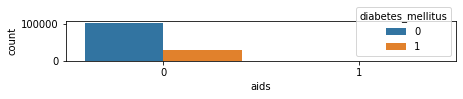

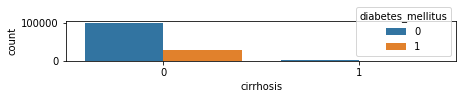

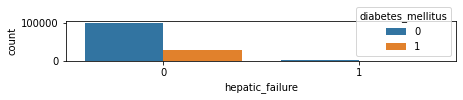

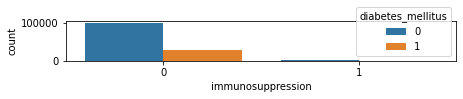

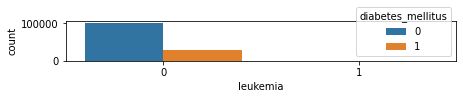

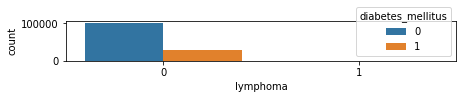

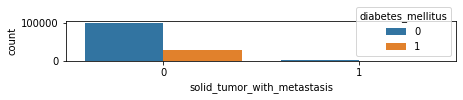

In [ ]:
for i,j in enumerate(df.columns[comorb-1]):
  plt.figure(figsize=(7,6))
  plt.subplot(7,1,i+1)
  sns.countplot(df[j],hue=df['diabetes_mellitus'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


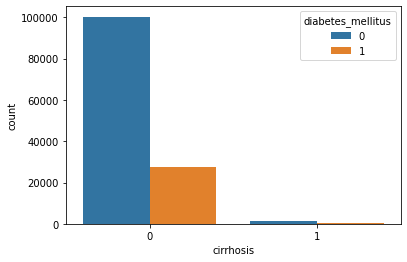

In [ ]:
sns.countplot(df['cirrhosis'],hue=df['diabetes_mellitus'])

In [ ]:
df['aids'].value_counts()

0    129855
1       134
Name: aids, dtype: int64

APACHE comorbidities can be retained or dropped, No null, Does not seem to show a great influence on the target variable